# Machine Learning Modeling 
## Superviced Learning (Regression)

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


KeyboardInterrupt: ignored

In [ ]:
df = pd.read_csv('gdrive/My Drive/folder final project/data_for_ml.csv')
# jika tidak ditaruh folder manapun, cukup dengan df = pd.read_csv('gdrive/My Drive/data_for_eda.csv')


In [ ]:
df.head()

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,class_car
0,0,8750,2013,hyundai,sonata,excellent,4 cylinders,gas,90821,clean,automatic,fwd,Unknown,other,grey,mn,basic car
1,1,10900,2013,toyota,prius,good,4 cylinders,hybrid,92800,clean,automatic,fwd,Unknown,other,blue,ct,basic car
2,2,7995,2010,chevrolet,equinox,good,4 cylinders,gas,108124,clean,automatic,4wd,full-size,SUV,grey,mn,basic car
3,3,14995,2011,chevrolet,silverado 1500,good,8 cylinders,gas,102462,clean,automatic,4wd,full-size,truck,blue,mn,basic car
4,4,37500,2009,other,international 8600,excellent,6 cylinders,diesel,87691,clean,manual,fwd,full-size,truck,white,nm,luxury car


In [ ]:
df = df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df.isna().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
class_car       0
dtype: int64

In [ ]:
print(f'Total kolom: {df.shape[0]}') 
print(f'Total baris: {df.shape[1]}') 

Total kolom: 147129
Total baris: 16


In [ ]:
# Data Summary
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        ((df[i].isna().sum())/len(df) *100).round(2),
        df[i].nunique(),
        df[i].unique()
    ])
pd.DataFrame(data = dfDesc, columns = ['Features', 'D types', 'Null', 'Null%', 'Unique', 'Unique Value'])

# Berdasarkan data dibawah, tampak data sudah bersih, tidak Null/Nan Values terdeteksi

,Features,D types,Null,Null%,Unique,Unique Value
0,price,int64,0,0.0,10930,"[8750, 10900, 7995, 14995, 37500, 28990, 13995..."
1,year,int64,0,0.0,12,"[2013, 2010, 2011, 2009, 2019, 2012, 2014, 201..."
2,manufacturer,object,0,0.0,38,"[hyundai, toyota, chevrolet, other, jeep, ford..."
3,model,object,0,0.0,12011,"[sonata, prius, equinox, silverado 1500, inter..."
4,condition,object,0,0.0,7,"[excellent, good, unknown, like new, fair, new..."
5,cylinders,object,0,0.0,8,"[4 cylinders, 8 cylinders, 6 cylinders, other,..."
6,fuel,object,0,0.0,5,"[gas, hybrid, diesel, other, electric]"
7,odometer,int64,0,0.0,48631,"[90821, 92800, 108124, 102462, 87691, 23772, 8..."
8,title_status,object,0,0.0,5,"[clean, lien, rebuilt, salvage, unknown]"
9,transmission,object,0,0.0,3,"[automatic, manual, other]"


## Data Preparation

Karena ada beberapa data yang bentuknya belum integer, maka saya akan melakukan cek asosiasi

In [ ]:
def correlation_ratio(categories, measurement):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measure = measurement[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measure)
        y_avg_array[i] = np.average(cat_measure)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurement, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [ ]:
cat_col= df.select_dtypes(include=['object']).columns
cat_col

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'state'],
      dtype='object')

In [ ]:
for i in cat_col:
  print(f"{i}\t: {correlation_ratio(df[i], df['price'])}")

manufacturer	: 0.39859335170062815
model	: 0.8299492637353892
condition	: 0.17947450331371972
cylinders	: 0.3971182917975397
fuel	: 0.23932568279182995
title_status	: 0.12634514292940127
transmission	: 0.09010851258211725
drive	: 0.4471942808072474
size	: 0.1913748790397145
type	: 0.4928870223329115
paint_color	: 0.1246021802022477
state	: 0.22289861428869287


kolom model memiliki asosiasi paling tinggi terhadap price

In [ ]:
df.corr('spearman')

,price,year,odometer
price,1.000000,0.567648,-0.485681
year,0.567648,1.000000,-0.686543
odometer,-0.485681,-0.686543,1.000000


Menggunakan hasil korelasi spearman karena distribusi data tidak normal, dapat dilihat bahwa year memiliki korelasi positif sedangkan odometer memiliki korelasi negatif terhadap price

In [ ]:
!pip install dython
import dython
from dython.nominal import associations

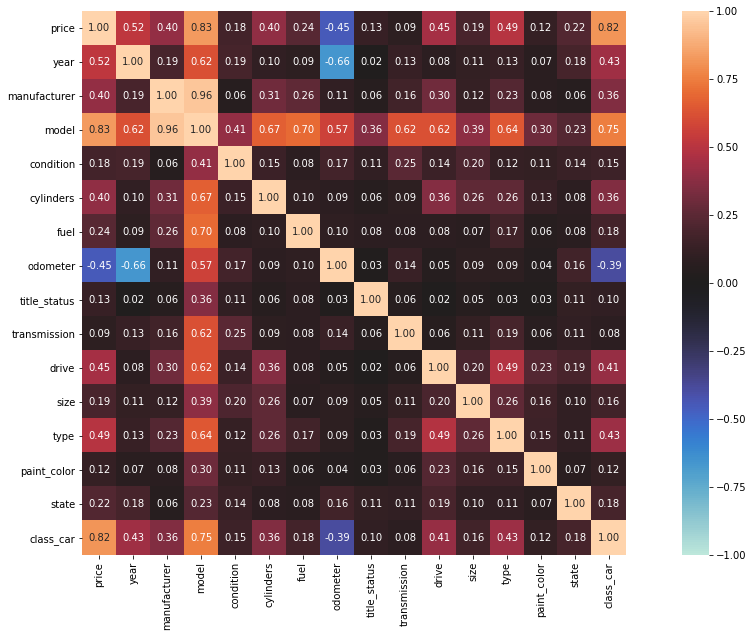

In [ ]:
associations(df, figsize=(20,10))
plt.show()

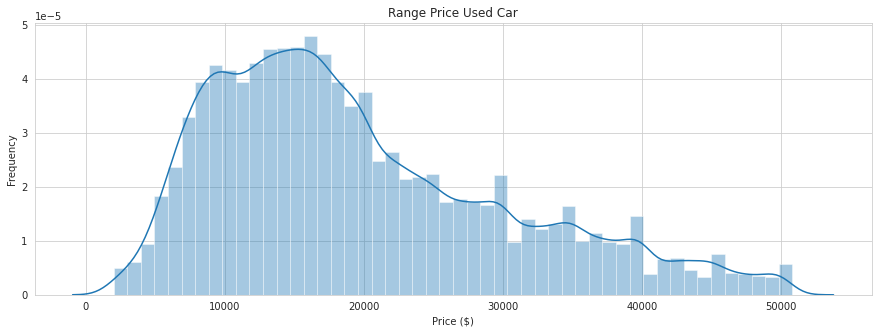

In [ ]:
plt.figure(figsize=(15,5))
a = sns.distplot(df['price'])
a.set(xlabel='Price ($)',ylabel='Frequency')
a.set_title('Range Price Used Car')
plt.show;


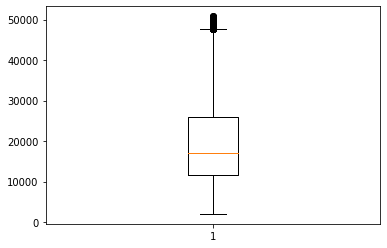

In [ ]:
plt.boxplot(df['price'])
plt.show()

## Feature Engineering

Karena class car digunakan dalam melakukan prediksi, maka perlu dilakukan label encode  agar bisa digunakan untuk machine learning

In [ ]:
## Label Encoding Class_car
df['class_car'] = df['class_car'].map({
    'basic car' : 0,
    'luxury car' : 1
})

In [ ]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,class_car
0,8750,2013,hyundai,sonata,excellent,4 cylinders,gas,90821,clean,automatic,fwd,Unknown,other,grey,mn,0
1,10900,2013,toyota,prius,good,4 cylinders,hybrid,92800,clean,automatic,fwd,Unknown,other,blue,ct,0
2,7995,2010,chevrolet,equinox,good,4 cylinders,gas,108124,clean,automatic,4wd,full-size,SUV,grey,mn,0
3,14995,2011,chevrolet,silverado 1500,good,8 cylinders,gas,102462,clean,automatic,4wd,full-size,truck,blue,mn,0
4,37500,2009,other,international 8600,excellent,6 cylinders,diesel,87691,clean,manual,fwd,full-size,truck,white,nm,1


## Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [ ]:
X = df.drop(columns=['price','model','paint_color'])
y = df['price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

In [ ]:
cat_columns = ['manufacturer','condition','cylinders','fuel','title_status','drive','size','type','state','transmission','class_car']

num_columns = ['year', 'odometer']

In [ ]:
from scipy.stats import skew
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor


## Pipeline

In [ ]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_KNN = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsRegressor())
])

In [ ]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_DT = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeRegressor())
])

In [ ]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_RF = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor())
])

In [ ]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_XGB = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor())
])

## Base Model

### 1.1 Kneighbors Regressor

In [ ]:
# KNN
KNN_pipe = pipe_KNN.fit(X_train, y_train)

In [ ]:
knn_pipe_train = KNN_pipe.predict(X_train)
knn_pipe_test = KNN_pipe.predict(X_test)


In [ ]:
#KNN Train
knn_R2_train = r2_score(y_train, knn_pipe_train)
knn_MAE_train = mean_absolute_error(y_train, knn_pipe_train)
knn_MSE_train = mean_squared_error(y_train, knn_pipe_train)
knn_RMSE_train = np.sqrt(knn_MSE_train)
#KNN Test
knn_R2_test = r2_score(y_test, knn_pipe_test)
knn_MAE_test = mean_absolute_error(y_test, knn_pipe_test)
knn_MSE_test = mean_squared_error(y_test, knn_pipe_test)
knn_RMSE_test = np.sqrt(knn_MSE_test)

In [ ]:
baseModelKNN = pd.DataFrame({
    "R2 Score" : [knn_R2_train,knn_R2_test],
    "MAE" : [knn_MAE_train,knn_MAE_test],
    "MSE" : [knn_MSE_train,knn_MSE_test],
    "RMSE" : [knn_RMSE_train,knn_RMSE_test]
}, index = ["KNN Train", "KNN Test"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelKNN)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
KNN Train,0.926954,1830.933327,8.292020e+06,2879.586849
KNN Test,0.880119,2358.071563,1.336116e+07,3655.291630


### 1.2 XGB Regressor

In [ ]:
# xgb
xgb_pipe = pipe_XGB.fit(X_train, y_train)

[04:41:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_pipe_train = xgb_pipe.predict(X_train)
xgb_pipe_test = xgb_pipe.predict(X_test)


In [ ]:
#xgb Train
xgb_R2_train = r2_score(y_train, xgb_pipe_train)
xgb_MAE_train = mean_absolute_error(y_train, xgb_pipe_train)
xgb_MSE_train = mean_squared_error(y_train, xgb_pipe_train)
xgb_RMSE_train = np.sqrt(xgb_MSE_train)
#KNN Test
xgb_R2_test = r2_score(y_test, xgb_pipe_test)
xgb_MAE_test = mean_absolute_error(y_test, xgb_pipe_test)
xgb_MSE_test = mean_squared_error(y_test, xgb_pipe_test)
xgb_RMSE_test = np.sqrt(xgb_MSE_test)

In [ ]:
baseModelxgb = pd.DataFrame({
    "R2 Score" : [xgb_R2_train,xgb_R2_test],
    "MAE" : [xgb_MAE_train,xgb_MAE_test],
    "MSE" : [xgb_MSE_train,xgb_MSE_test],
    "RMSE" : [xgb_RMSE_train,xgb_RMSE_test]
}, index = ["XGB Train", "XGB Test"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelxgb)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
XGB Train,0.820873,3392.959954,2.033409e+07,4509.333434
XGB Test,0.816556,3388.525018,2.044551e+07,4521.671703


### 1.3 Decision Tree Regressor

In [ ]:
#dt
dt_pipe = pipe_DT.fit(X_train, y_train)

In [ ]:
dt_pipe_train = dt_pipe.predict(X_train)
dt_pipe_test = dt_pipe.predict(X_test)

In [ ]:
#dt Train
dt_R2_train = r2_score(y_train, dt_pipe_train)
dt_MAE_train = mean_absolute_error(y_train, dt_pipe_train)
dt_MSE_train = mean_squared_error(y_train, dt_pipe_train)
dt_RMSE_train = np.sqrt(dt_MSE_train)
#dt Test
dt_R2_test = r2_score(y_test, dt_pipe_test)
dt_MAE_test = mean_absolute_error(y_test, dt_pipe_test)
dt_MSE_test = mean_squared_error(y_test, dt_pipe_test)
dt_RMSE_test = np.sqrt(dt_MSE_test)

In [ ]:
baseModeldt = pd.DataFrame({
    "R2 Score" : [dt_R2_train,dt_R2_test],
    "MAE" : [dt_MAE_train,dt_MAE_test],
    "MSE" : [dt_MSE_train,dt_MSE_test],
    "RMSE" : [dt_RMSE_train,dt_RMSE_test]
}, index = ["DT Train", "DT Test"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModeldt)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
DT Train,0.996141,114.818561,4.380655e+05,661.865146
DT Test,0.867186,2003.034439,1.480261e+07,3847.415978


### 1.4 Random Forest Regressor

In [ ]:
#rf
rf_pipe = pipe_RF.fit(X_train, y_train)

In [ ]:
rf_pipe_train = rf_pipe.predict(X_train)
rf_pipe_test = rf_pipe.predict(X_test)


In [ ]:
#rf Train
rf_R2_train = r2_score(y_train, rf_pipe_train)
rf_MAE_train = mean_absolute_error(y_train, rf_pipe_train)
rf_MSE_train = mean_squared_error(y_train, rf_pipe_train)
rf_RMSE_train = np.sqrt(rf_MSE_train)
#rf Test
rf_R2_test = r2_score(y_test, rf_pipe_test)
rf_MAE_test = mean_absolute_error(y_test, rf_pipe_test)
rf_MSE_test = mean_squared_error(y_test, rf_pipe_test)
rf_RMSE_test = np.sqrt(rf_MSE_test)

In [ ]:
baseModelrf = pd.DataFrame({
    "R2 Score" : [rf_R2_train,rf_R2_test],
    "MAE" : [rf_MAE_train,rf_MAE_test],
    "MSE" : [rf_MSE_train,rf_MSE_test],
    "RMSE" : [rf_RMSE_train,rf_RMSE_test]
}, index = ["RF Train", "RF Test"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelrf)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
RF Train,0.986511,703.686314,1.531241e+06,1237.433086
RF Test,0.921636,1753.446773,8.734009e+06,2955.335670


### 1.5 Summary of Base Model

In [ ]:
baseModel = pd.DataFrame({
    "R2 Score" : [rf_R2_train,rf_R2_test,knn_R2_train,knn_R2_test,xgb_R2_train,xgb_R2_test,dt_R2_train,dt_R2_test],
    "MAE" : [rf_MAE_train,rf_MAE_test,knn_MAE_train,knn_MAE_test,xgb_MAE_train,xgb_MAE_test,dt_MAE_train,dt_MAE_test],
    "MSE" : [rf_MSE_train,rf_MSE_test,knn_MSE_train,knn_MSE_test,xgb_MSE_train,xgb_MSE_test,dt_MSE_train,dt_MSE_test],
    "RMSE" : [rf_RMSE_train,rf_RMSE_test,knn_RMSE_train,knn_RMSE_test,xgb_RMSE_train,xgb_RMSE_test,dt_RMSE_train,dt_RMSE_test]
}, index = ["RF Train", "RF Test","KNN Train", "KNN Test","XGB Train", "XGB Test","DT Train", "DT Test"])


print("Hasil metrik evaluasi tiap algoritma (data latih):")
baseModel.T

Hasil metrik evaluasi tiap algoritma (data latih):


,RF Train,RF Test,KNN Train,KNN Test,XGB Train,XGB Test,DT Train,DT Test
R2 Score,9.865110e-01,9.216356e-01,9.269540e-01,8.801193e-01,8.208731e-01,8.165562e-01,0.996141,8.671862e-01
MAE,7.036863e+02,1.753447e+03,1.830933e+03,2.358072e+03,3.392960e+03,3.388525e+03,114.818561,2.003034e+03
MSE,1.531241e+06,8.734009e+06,8.292020e+06,1.336116e+07,2.033409e+07,2.044551e+07,438065.470867,1.480261e+07
RMSE,1.237433e+03,2.955336e+03,2.879587e+03,3.655292e+03,4.509333e+03,4.521672e+03,661.865146,3.847416e+03


Setelah dilakukan tuning, dapat dilihat bahwa beberapa model, R2 Scorenya overfit sehingga akan dilakukan lagi hypertuning agar tidak overfit

## Hyper Parameter Tuning

#### 2.1 Decision Tree Regressor Tuning

In [ ]:
pipe_DT.get_params()

{'algo': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'algo__ccp_alpha': 0.0,
 'algo__criterion': 'mse',
 'algo__max_depth': None,
 'algo__max_features': None,
 'algo__max_leaf_nodes': None,
 'algo__min_impurity_decrease': 0.0,
 'algo__min_impurity_split': None,
 'algo__min_samples_leaf': 1,
 'algo__min_samples_split': 2,
 'algo__min_weight_fraction_leaf': 0.0,
 'algo__presort': 'deprecated',
 'algo__random_state': None,
 'algo__splitter': 'best',
 'memory': None,
 'prep': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('numeric'

In [ ]:
param_DT = {'algo__max_depth':[ None,1, 3, 5 ],
            'algo__min_samples_split':[ 17,21,31],
            'algo__min_samples_leaf':[ 7,10,15],
            'algo__max_features':[None,0.1,0.2,0.3]}


In [ ]:
model_DT = RandomizedSearchCV(estimator = pipe_DT, param_distributions=param_DT, n_jobs = -1, cv=3, verbose =1)


In [ ]:
model_DT.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.4s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('prep',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numeric',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('scaler',
                                                                                                StandardScaler(copy=True,
                                                                                                   

In [ ]:
DT_tuned = model_DT.best_estimator_

In [ ]:
model_DT.best_params_

{'algo__max_depth': None,
 'algo__max_features': 0.3,
 'algo__min_samples_leaf': 15,
 'algo__min_samples_split': 31}

In [ ]:
dt_pipe_train_tuned = DT_tuned.predict(X_train)
dt_pipe_test_tuned = DT_tuned.predict(X_test)

In [ ]:
#dt Train tuned
dt_R2_train_tuned = r2_score(y_train, dt_pipe_train_tuned)
dt_MAE_train_tuned = mean_absolute_error(y_train, dt_pipe_train_tuned)
dt_MSE_train_tuned = mean_squared_error(y_train, dt_pipe_train_tuned)
dt_RMSE_train_tuned = np.sqrt(dt_MSE_train_tuned)
#dt Test tuned
dt_R2_test_tuned = r2_score(y_test, dt_pipe_test_tuned)
dt_MAE_test_tuned = mean_absolute_error(y_test, dt_pipe_test_tuned)
dt_MSE_test_tuned = mean_squared_error(y_test, dt_pipe_test_tuned)
dt_RMSE_test_tuned = np.sqrt(dt_MSE_test_tuned)

In [ ]:
baseModeldtTuned = pd.DataFrame({
    "R2 Score" : [dt_R2_train_tuned,dt_R2_test_tuned],
    "MAE" : [dt_MAE_train_tuned,dt_MAE_test_tuned],
    "MSE" : [dt_MSE_train_tuned,dt_MSE_test_tuned],
    "RMSE" : [dt_RMSE_train_tuned,dt_RMSE_test_tuned]
}, index = ["DT Train Tuned", "DT Test Tuned"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModeldtTuned)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
DT Train Tuned,0.876156,2646.407398,1.405855e+07,3749.472855
DT Test Tuned,0.850621,2883.909232,1.664892e+07,4080.308277


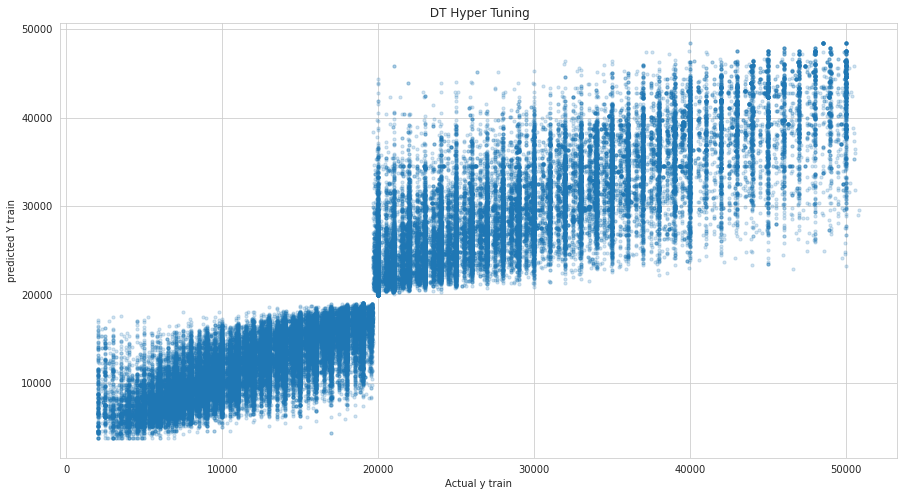

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_train,dt_pipe_train_tuned,s=10, alpha=0.2)
plt.title(' DT Hyper Tuning')
plt.xlabel('Actual y train')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

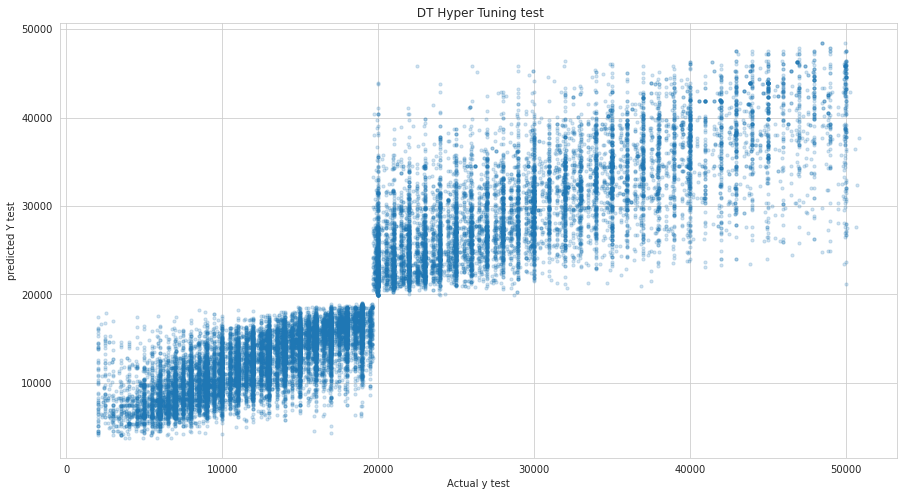

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dt_pipe_test_tuned,s=10, alpha=0.2)
plt.title(' DT Hyper Tuning test')
plt.xlabel('Actual y test')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')

#### 2.2 Random Forest Regressor Tuning

In [ ]:
pipe_RF.get_params()

{'algo': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 'algo__bootstrap': True,
 'algo__ccp_alpha': 0.0,
 'algo__criterion': 'mse',
 'algo__max_depth': None,
 'algo__max_features': 'auto',
 'algo__max_leaf_nodes': None,
 'algo__max_samples': None,
 'algo__min_impurity_decrease': 0.0,
 'algo__min_impurity_split': None,
 'algo__min_samples_leaf': 1,
 'algo__min_samples_split': 2,
 'algo__min_weight_fraction_leaf': 0.0,
 'algo__n_estimators': 100,
 'algo__n_jobs': None,
 'algo__oob_score': False,
 'algo__random_state': None,
 'algo__verbo

In [ ]:
param_RF = {'algo__max_depth':[None, 5, 9],
            'algo__min_samples_split':[2, 5, 9],
            'algo__min_samples_leaf':[1, 5, 10],
            'algo__max_features':[None,0.2,0.5],
           'algo__n_estimators':[100, 200, 450]}

In [ ]:
model_RF = RandomizedSearchCV(estimator = pipe_RF, param_distributions=param_RF, n_jobs = -1, cv=3, verbose =1)


In [ ]:
model_RF.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 143.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('prep',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numeric',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('scaler',
                                                                                                StandardScaler(copy=True,
                                                                                                   

In [ ]:
RF_tuned = model_RF.best_estimator_

In [ ]:
model_RF.best_params_

{'algo__max_depth': None,
 'algo__max_features': 0.5,
 'algo__min_samples_leaf': 5,
 'algo__min_samples_split': 9,
 'algo__n_estimators': 450}

In [ ]:
rf_pipe_train_tuned = RF_tuned.predict(X_train)
rf_pipe_test_tuned = RF_tuned.predict(X_test)

In [ ]:
#rf Train tuned
rf_R2_train_tuned = r2_score(y_train, rf_pipe_train_tuned)
rf_MAE_train_tuned = mean_absolute_error(y_train, rf_pipe_train_tuned)
rf_MSE_train_tuned = mean_squared_error(y_train, rf_pipe_train_tuned)
rf_RMSE_train_tuned = np.sqrt(rf_MSE_train_tuned)
#rf Test tuned
rf_R2_test_tuned = r2_score(y_test, rf_pipe_test_tuned)
rf_MAE_test_tuned = mean_absolute_error(y_test, rf_pipe_test_tuned)
rf_MSE_test_tuned = mean_squared_error(y_test, rf_pipe_test_tuned)
rf_RMSE_test_tuned = np.sqrt(rf_MSE_test_tuned)

In [ ]:
baseModelrfTuned = pd.DataFrame({
    "R2 Score" : [rf_R2_train_tuned,rf_R2_test_tuned],
    "MAE" : [rf_MAE_train_tuned,rf_MAE_test_tuned],
    "MSE" : [rf_MSE_train_tuned,rf_MSE_test_tuned],
    "RMSE" : [rf_RMSE_train_tuned,rf_RMSE_test_tuned]
}, index = ["RF Train Tuned", "RF Test Tuned"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelrfTuned)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
RF Train Tuned,0.937398,1797.64155,7.106453e+06,2665.793167
RF Test Tuned,0.904365,2213.10227,1.065891e+07,3264.798196


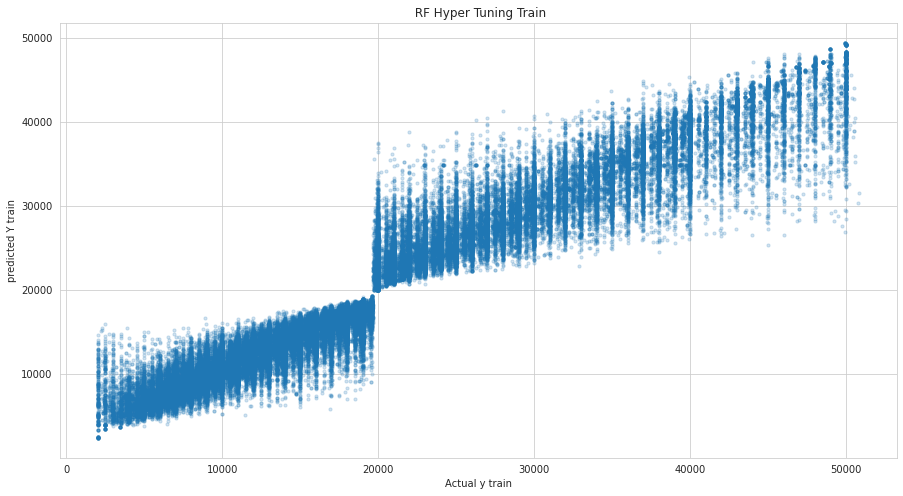

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_train,rf_pipe_train_tuned,s=10, alpha=0.2)
plt.title(' RF Hyper Tuning Train')
plt.xlabel('Actual y train')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

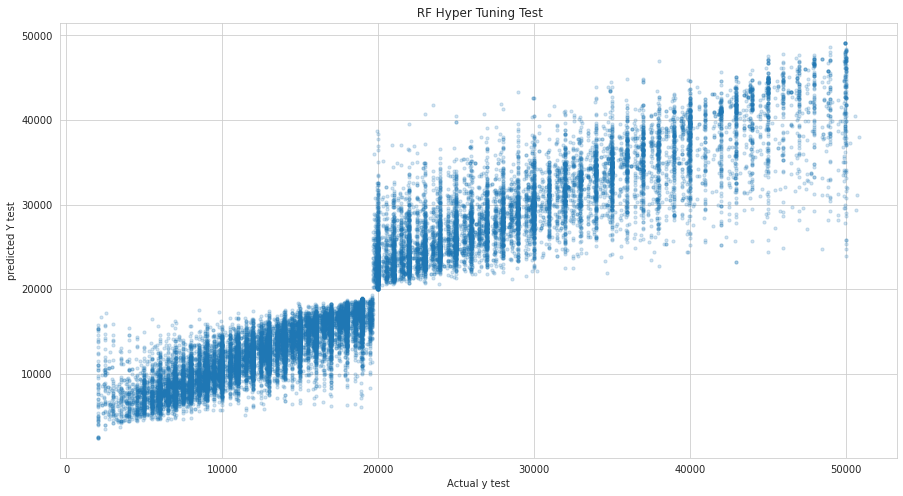

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rf_pipe_test_tuned,s=10, alpha=0.2)
plt.title(' RF Hyper Tuning Test')
plt.xlabel('Actual y test')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')

### 2.3. XGB  Regressor Tuning

In [ ]:
pipe_XGB.get_params()

{'algo': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              importance_type='gain', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),
 'algo__base_score': 0.5,
 'algo__booster': 'gbtree',
 'algo__colsample_bylevel': 1,
 'algo__colsample_bynode': 1,
 'algo__colsample_bytree': 1,
 'algo__gamma': 0,
 'algo__importance_type': 'gain',
 'algo__learning_rate': 0.1,
 'algo__max_delta_step': 0,
 'algo__max_depth': 3,
 'algo__min_child_weight': 1,
 'algo__missing': None,
 'algo__n_estimators': 100,
 'algo__n_jobs': 1,
 'algo__nthread': None,
 'algo__objective': 'reg:linear',
 'algo__random_state': 0,
 'algo__reg_alpha': 0,
 'algo__reg_lam

In [ ]:
param_XGB = {'algo__max_depth':[3,5,7,9],'algo__learning_rate':[0.1,0.2,0.5,1],'algo__n_estimators':[100,200,300],'algo__gamma':[0,3,5]}


In [ ]:
model_XGB = RandomizedSearchCV(estimator = pipe_XGB, param_distributions=param_XGB, n_jobs = -1, cv=3, verbose =1)


In [ ]:
model_XGB.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.9min finished


[06:32:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('prep',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numeric',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('scaler',
                                                                                                StandardScaler(copy=True,
                                                                                                   

In [ ]:
XGB_tuned = model_XGB.best_estimator_

In [ ]:
model_XGB.best_params_

{'algo__gamma': 0,
 'algo__learning_rate': 0.1,
 'algo__max_depth': 9,
 'algo__n_estimators': 200}

In [ ]:
xgb_pipe_train_tuned = XGB_tuned.predict(X_train)
xgb_pipe_test_tuned = XGB_tuned.predict(X_test)

In [ ]:
#xgb Train tuned
xgb_R2_train_tuned = r2_score(y_train, xgb_pipe_train_tuned)
xgb_MAE_train_tuned = mean_absolute_error(y_train, xgb_pipe_train_tuned)
xgb_MSE_train_tuned = mean_squared_error(y_train, xgb_pipe_train_tuned)
xgb_RMSE_train_tuned = np.sqrt(xgb_MSE_train_tuned)
#dt Test tuned
xgb_R2_test_tuned = r2_score(y_test, xgb_pipe_test_tuned)
xgb_MAE_test_tuned = mean_absolute_error(y_test, xgb_pipe_test_tuned)
xgb_MSE_test_tuned = mean_squared_error(y_test, xgb_pipe_test_tuned)
xgb_RMSE_test_tuned = np.sqrt(xgb_MSE_test_tuned)

In [ ]:
baseModelxgbTuned = pd.DataFrame({
    "R2 Score" : [xgb_R2_train_tuned,xgb_R2_test_tuned],
    "MAE" : [xgb_MAE_train_tuned,xgb_MAE_test_tuned],
    "MSE" : [xgb_MSE_train_tuned,xgb_MSE_test_tuned],
    "RMSE" : [xgb_RMSE_train_tuned,xgb_RMSE_test_tuned]
}, index = ["XGB Train Tuned", "XGB Test Tuned"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelxgbTuned)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
XGB Train Tuned,0.919426,2146.752474,9.146558e+06,3024.327723
XGB Test Tuned,0.896291,2390.409435,1.155878e+07,3399.821296


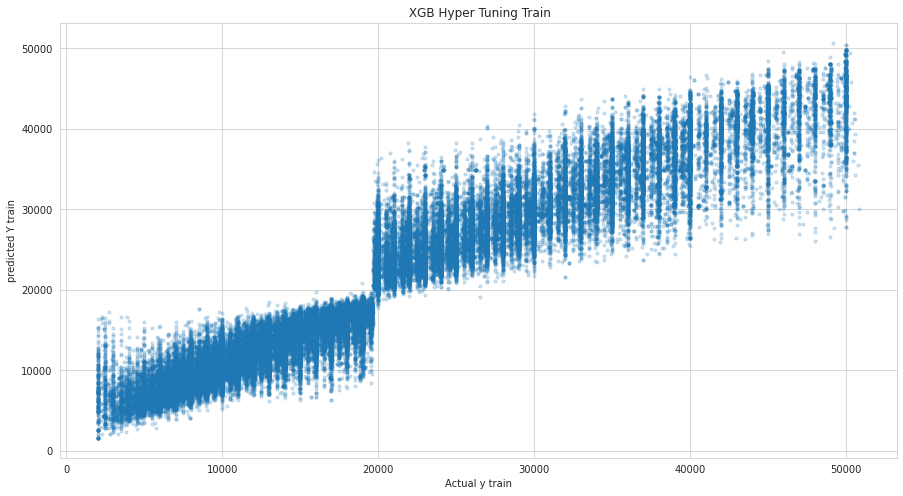

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_train,xgb_pipe_train_tuned,s=10, alpha=0.2)
plt.title(' XGB Hyper Tuning Train')
plt.xlabel('Actual y train')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

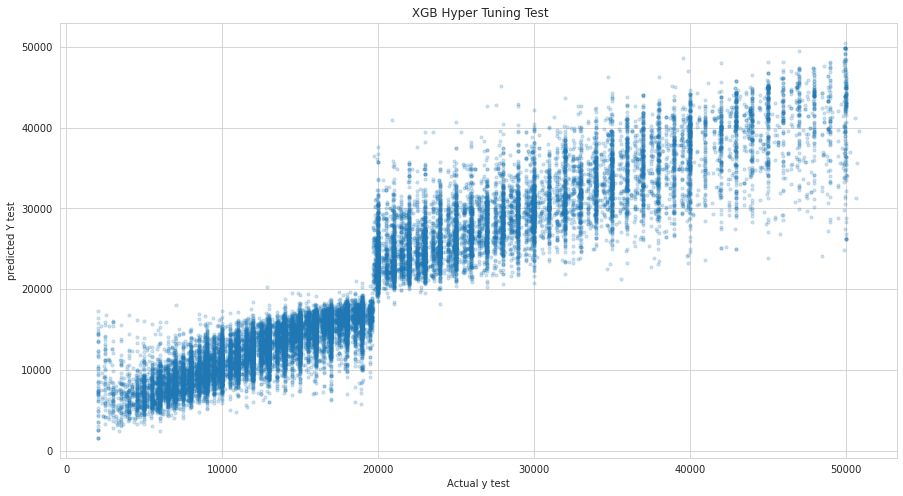

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,xgb_pipe_test_tuned,s=10, alpha=0.2)
plt.title(' XGB Hyper Tuning Test')
plt.xlabel('Actual y test')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')


### 2.4 Summary of Hyper Parameter Tuning

In [ ]:
baseModeltuned = pd.DataFrame({
    "R2 Score" : [rf_R2_train_tuned,rf_R2_test_tuned,xgb_R2_train_tuned,xgb_R2_test_tuned,dt_R2_train_tuned,dt_R2_test_tuned],
    "MAE" : [rf_MAE_train_tuned,rf_MAE_test_tuned,xgb_MAE_train_tuned,xgb_MAE_test_tuned,dt_MAE_train_tuned,dt_MAE_test_tuned],
    "MSE" : [rf_MSE_train_tuned,rf_MSE_test_tuned,xgb_MSE_train_tuned,xgb_MSE_test_tuned,dt_MSE_train_tuned,dt_MSE_test_tuned],
    "RMSE" : [rf_RMSE_train_tuned,rf_RMSE_test_tuned,xgb_RMSE_train_tuned,xgb_RMSE_test_tuned,dt_RMSE_train_tuned,dt_RMSE_test_tuned]
}, index = ["RF Train Tuned", "RF Test Tuned","XGB Train Tuned", "XGB Test Tuned","DT Train Tuned", "DT Test Tuned"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
baseModeltuned.T

Hasil metrik evaluasi tiap algoritma (data latih):


,RF Train Tuned,RF Test Tuned,XGB Train Tuned,XGB Test Tuned,DT Train Tuned,DT Test Tuned
R2 Score,9.373979e-01,9.043648e-01,9.194262e-01,8.962908e-01,8.761555e-01,8.506205e-01
MAE,1.797642e+03,2.213102e+03,2.146752e+03,2.390409e+03,2.646407e+03,2.883909e+03
MSE,7.106453e+06,1.065891e+07,9.146558e+06,1.155878e+07,1.405855e+07,1.664892e+07
RMSE,2.665793e+03,3.264798e+03,3.024328e+03,3.399821e+03,3.749473e+03,4.080308e+03


In [ ]:
hypertunedmodel = pd.DataFrame({'Actual':y_test, 'Prediction XGB': xgb_pipe_test_tuned,'Prediction RF': rf_pipe_test_tuned, 'Prediction DT': dt_pipe_test_tuned})
hypertunedmodel.head(100).mean()

Actual            20098.020000
Prediction XGB    20185.166016
Prediction RF     19936.207148
Prediction DT     20299.370665
dtype: float64

## Conclusion
Random Forest yang sudah di tuning adalah model terbaik untuk memprediksi harga mobil bekas di USA dengan tingkat akurasi adalah 90.4% dan dengan tingkat error yang paling kecil dibanding model machine learning lainnya.

## Deploy Model

In [ ]:
import joblib

In [ ]:
joblib.dump(XGB_tuned, 'Model_XGB_tuned_for_dashboard')


['Model_XGB_tuned_for_dashboard']

In [ ]:
joblib.dump(DT_tuned, 'Model_DT_tuned_for_dashboard')


['Model_DT_tuned_for_dashboard']

In [ ]:
joblib.dump(RF_tuned, 'Model_RF_tuned_for_dashboard')


['Model_RF_tuned_for_dashboard']

### Test Data

In [ ]:
data_arif = [{
    'year' : 2013,
    'manufacturer': 'honda',
    'model': 'supra',
    'condition': 'excellent',
    'cylinders': '4 cylinders',
    'fuel': 'diesel',
    'odometer': 2543,
    'title_status': 'clean',
    'transmission': 'automatic',
    'drive' : '4wd',
    'size' :'full-size',
    'type': 'SUV',
    'paint_color': 'grey',
    'state' : 'mn',
    'class_car' : '1'
}]

In [ ]:
arif = pd.DataFrame(data_arif, index=[1])

In [ ]:
model_RF.predict(arif)[0]

21564.402918506203